In [3]:
import pandas as pd
import numpy as np
import math

In [4]:
import tensorflow as tf
print(tf.__version__)

from tensorflow import keras
import tensorflow_datasets as tfds

2.9.1


In [5]:
tf.test.is_built_with_cuda()

True

In [6]:
(X_train, Y_train), (X_test, Y_test) = tfds.as_numpy(tfds.load('emnist', split = ['train', 'test'], 
                                                               batch_size=-1, as_supervised=True))

print('EMNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

EMNIST Dataset Shape:
X_train: (697932, 28, 28, 1)
Y_train: (697932,)
X_test:  (116323, 28, 28, 1)
Y_test:  (116323,)


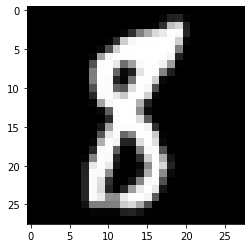

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 3
image = X_train[sample]
image = image.transpose().reshape(28,28)

# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [9]:
# find the unique labels (as numbers in this case)
labels_unique = np.unique(Y_train)

# find the total number of unique classes
num_classes = len(labels_unique)

print('Total number of classes : ', num_classes)
print('Unique labels : ', labels_unique)

Total number of classes :  62
Unique labels :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]


In [ ]:
# specify the number of rows and columns you want to see
num_row = 3
num_col = 5

# get a segment of the dataset
num = num_row*num_col
images = X_train[:num]
image = image.transpose().reshape(28,28)
labels = Y_train[:num]

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

plt.savefig('EMNIST.png', dpi=600, bbox_inches='tight')

In [ ]:
class_names = {i:cn for i, cn in enumerate(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 
                                            'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
                                            'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
                                            'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 
                                            'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 
                                            'y', 'z']) }
    

def plot(images, labels, predictions=None):
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(2*num_col,3*num_row))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes[i//num_col, i%num_col]
        #ax = axes.flat[i]
        
       # x = x.transpose(2,0,1).reshape(3,-1)
        x = x.reshape([28,28])
        x = x.transpose()
        
        #print(x)
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(class_names[y_true])
        plt.subplots_adjust(left=0.01,bottom=1,right=0.7,top=1.5,wspace=0.1,hspace=.8)
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        #ax.set_xticks([])
        #ax.set_yticks([])
    #plt.tight_layout()
    #plt.show()

# plot first few images
#plt.savefig('Fashion_MNIST.png', dpi=600)
plot(X_train[:15], Y_train[:15]) 
